**BYREDDY AKHILESWAR REDDY**

21BCE9783

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the Titanic dataset
titanic_data = sns.load_dataset("titanic")

In [16]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 1 to 889
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   survived          203 non-null    int64   
 1   pclass            203 non-null    int64   
 2   age               203 non-null    float64 
 3   sibsp             203 non-null    int64   
 4   parch             203 non-null    int64   
 5   fare              203 non-null    float64 
 6   class             203 non-null    category
 7   who               203 non-null    object  
 8   adult_male        203 non-null    bool    
 9   deck              203 non-null    category
 10  embark_town       201 non-null    object  
 11  alive             203 non-null    object  
 12  alone             203 non-null    bool    
 13  sex_encoded       203 non-null    int64   
 14  embarked_encoded  203 non-null    int64   
dtypes: bool(2), category(2), float64(2), int64(6), object(3)
memory usage: 20.

In [3]:
# Handling missing values
# Fill missing values in 'age' with the mean age
titanic_data['age'].fillna(titanic_data['age'].mean(), inplace=True)

In [4]:
# Fill missing values in 'embarked' with the most frequent value
most_frequent_embarked = titanic_data['embarked'].mode()[0]
titanic_data['embarked'].fillna(most_frequent_embarked, inplace=True)

In [5]:
# Drop rows with missing values in 'deck' column
titanic_data.dropna(subset=['deck'], inplace=True)

In [6]:
# Encoding categorical variables
label_encoder = LabelEncoder()
titanic_data['sex_encoded'] = label_encoder.fit_transform(titanic_data['sex'])
titanic_data['embarked_encoded'] = label_encoder.fit_transform(titanic_data['embarked'])

In [7]:
# Drop the original categorical columns
titanic_data.drop(['sex', 'embarked'], axis=1, inplace=True)

In [8]:
# Scaling numeric features (e.g., 'age', 'fare')
scaler = StandardScaler()
titanic_data[['age', 'fare']] = scaler.fit_transform(titanic_data[['age', 'fare']])

In [9]:
# Splitting the data into training and testing sets
X = titanic_data.drop('survived', axis=1)
y = titanic_data['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
sns.set(style="whitegrid")

In [12]:
import matplotlib.pyplot as plt

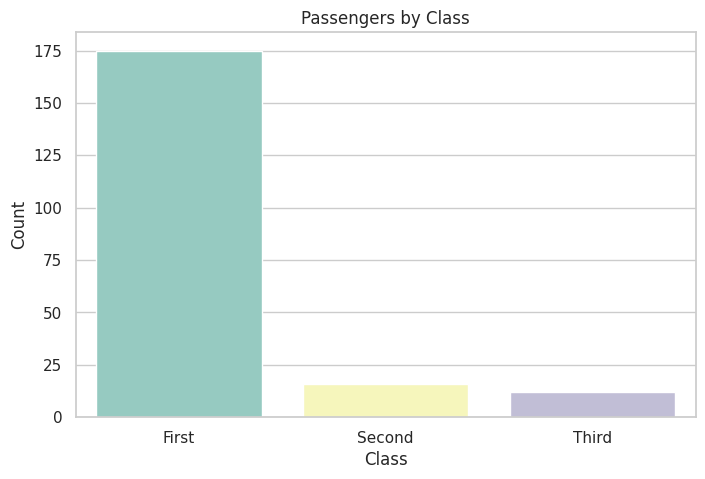

In [13]:
plt.figure(figsize=(8, 5))
sns.countplot(data=titanic_data, x='class', palette='Set3')
plt.title("Passengers by Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

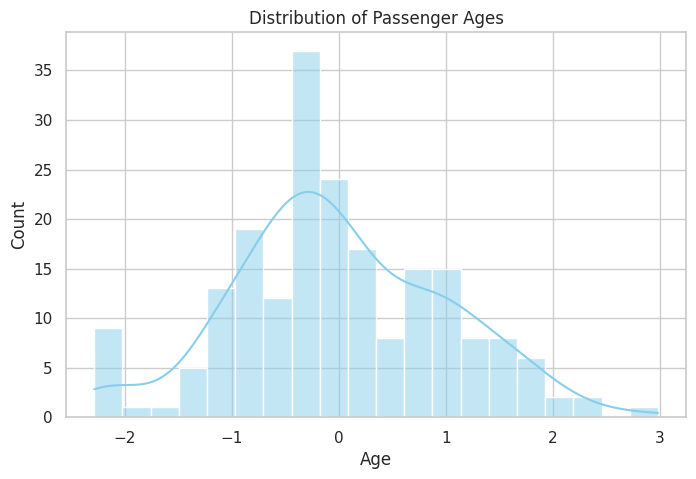

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(data=titanic_data, x='age', bins=20, kde=True, color='skyblue')
plt.title("Distribution of Passenger Ages")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

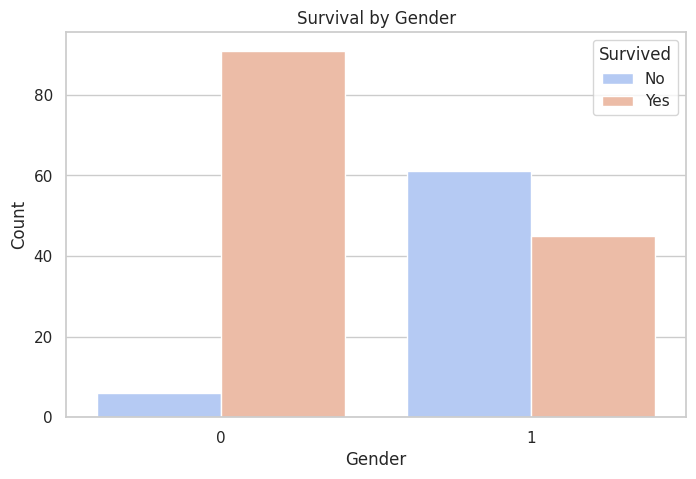

In [17]:
plt.figure(figsize=(8, 5))
sns.countplot(data=titanic_data, x='sex_encoded', hue='survived', palette='coolwarm')
plt.title("Survival by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()


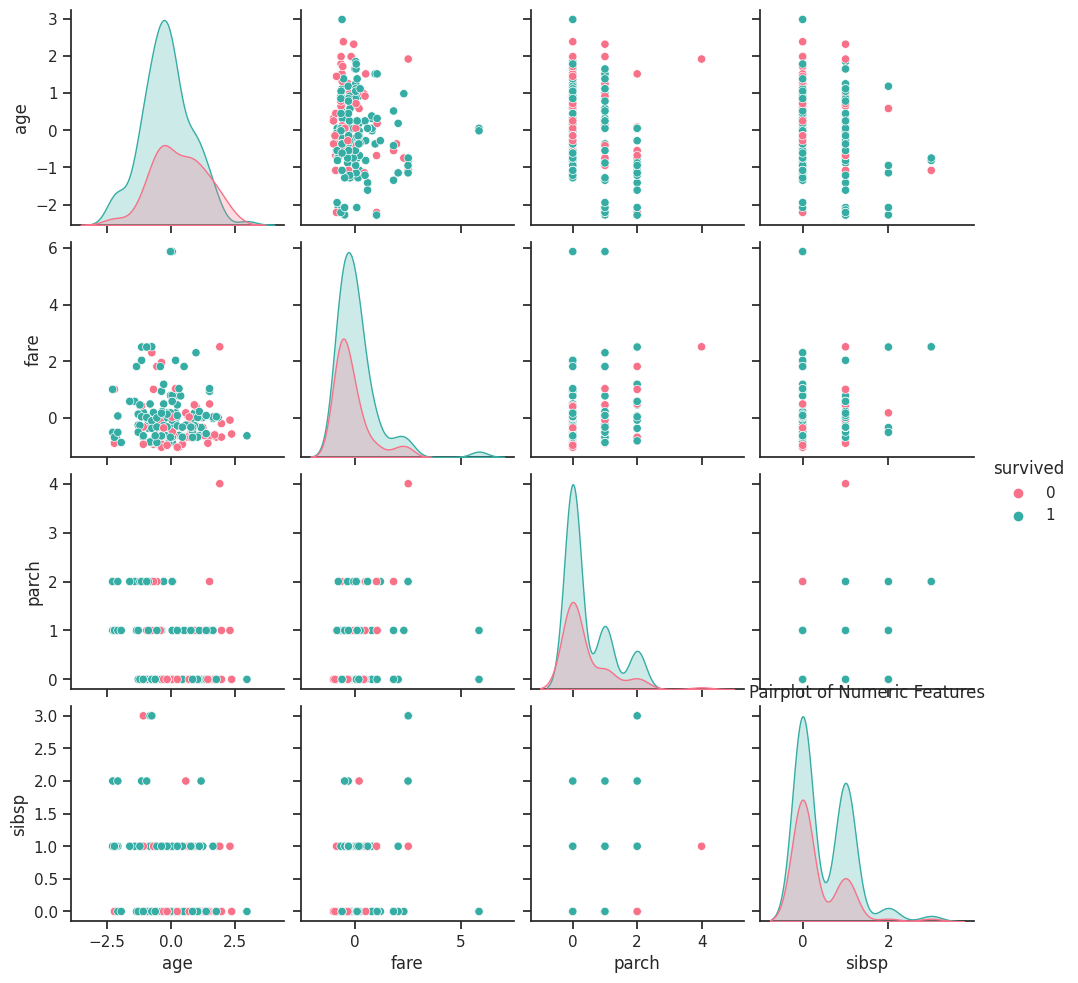

In [18]:
sns.set(style="ticks")
numeric_features = ['age', 'fare', 'parch', 'sibsp']
sns.pairplot(titanic_data, vars=numeric_features, hue='survived', palette='husl')
plt.title("Pairplot of Numeric Features")
plt.show()

<ipython-input-19-58798283c623>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = titanic_data.corr()


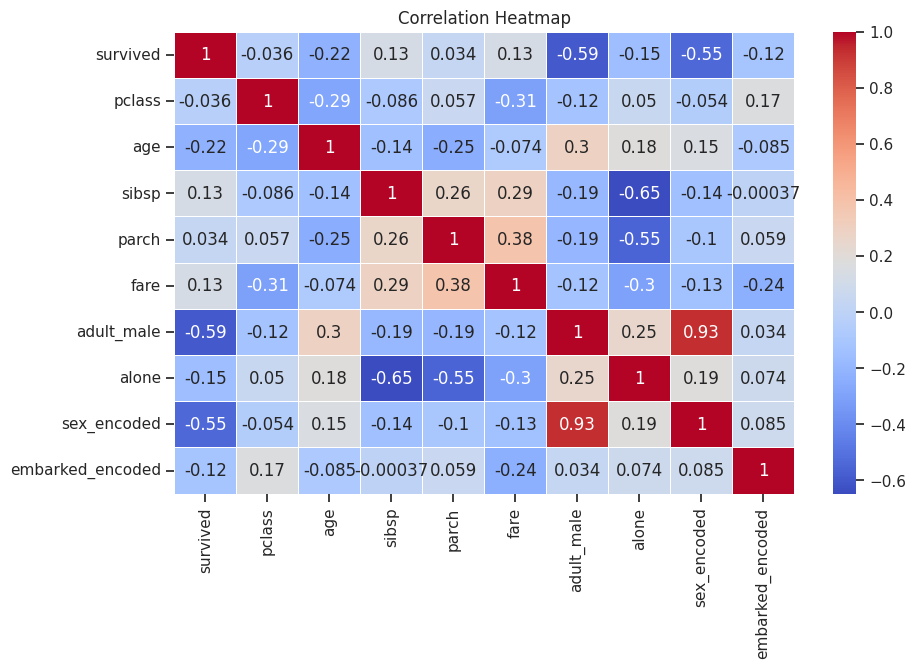

In [19]:
plt.figure(figsize=(10, 6))
correlation_matrix = titanic_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

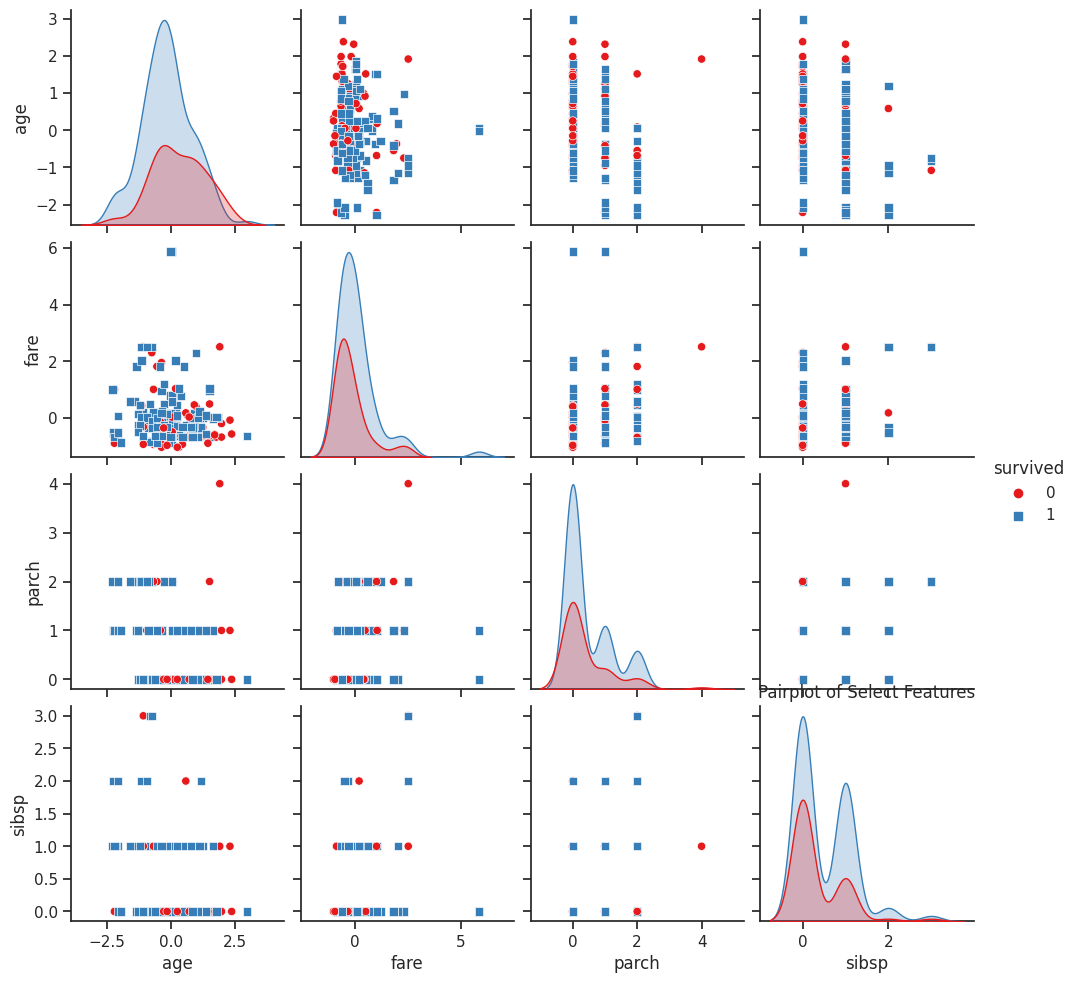

In [20]:
selected_features = ['age', 'fare', 'parch', 'sibsp', 'class', 'survived']
sns.pairplot(titanic_data[selected_features], hue='survived', palette='Set1', markers=['o', 's'])
plt.title("Pairplot of Select Features")
plt.show()


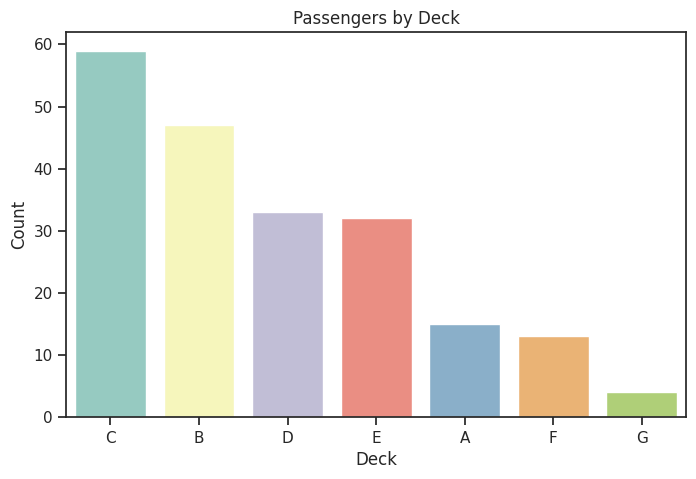

In [21]:
plt.figure(figsize=(8, 5))
sns.countplot(data=titanic_data, x='deck', palette='Set3', order=titanic_data['deck'].value_counts().index)
plt.title("Passengers by Deck")
plt.xlabel("Deck")
plt.ylabel("Count")
plt.show()

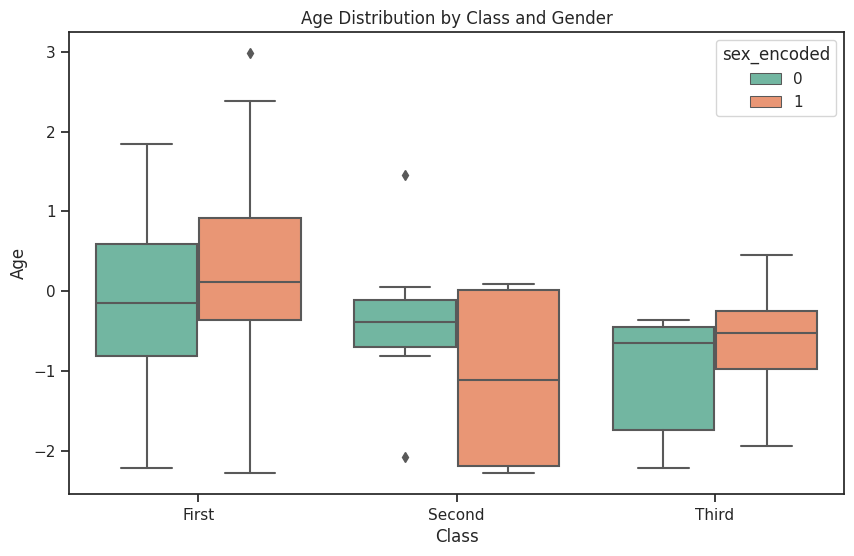

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=titanic_data, x='class', y='age', hue='sex_encoded', palette='Set2')
plt.title("Age Distribution by Class and Gender")
plt.xlabel("Class")
plt.ylabel("Age")
plt.show()